In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("../../zhvi_by_zipcode.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,111151.195242,...,267088.738142,271250.476096,275051.851633,277970.120290,279500.684442,279697.150054,279104.469255,278122.923459,276568.124992,274755.808173
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,218236.629470,...,460366.228569,467388.730310,473486.818408,477210.492486,477972.632081,476552.241458,474927.181941,473561.165436,471632.475487,469463.920712
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,93511.297481,...,180617.660428,182848.963204,185058.256434,187026.835439,188577.658260,189624.441718,190377.686632,191140.365708,191676.845108,192633.473062
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,276416.230880,...,835406.121511,842807.006210,852430.158990,860866.920365,867010.977280,866822.751400,865391.430701,864100.411762,862703.784805,861787.760011
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,249528.121575,...,759177.513267,766420.820233,774753.358516,781832.465374,785731.251344,785676.921895,784991.325145,784384.072545,782591.242654,781072.618787


In [3]:
df_local = df.loc[(df["Metro"]=="Austin-Round Rock-Georgetown, TX"),:]
num_of_zips = len(df_local["RegionName"])
print(f"There are {num_of_zips} zip codes for the 'Austin-Round Rock-Georgetown' metroplex")

There are 86 zip codes for the 'Austin-Round Rock-Georgetown' metroplex


In [4]:
# Write to CSV
df_local.to_csv('../Resources/AustinMetroZHVI.csv')

In [5]:
df_local.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2022-09-30    float64
2022-10-31    float64
2022-11-30    float64
2022-12-31    float64
2023-01-31    float64
Length: 286, dtype: object

In [6]:
df_78739 = df_local.loc[df_local["RegionName"]==78739, :]
df_78739_data = df_78739.iloc[:,9:]
df_78739_data

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
5585,359253.222565,360119.934617,360593.264503,361817.135898,361456.328366,361066.984369,360222.794126,359824.779547,359888.743259,361439.429825,...,831006.413701,845983.895531,854035.950967,852474.536476,845728.550181,836555.98254,829830.64314,824913.495518,819702.055836,814084.604018


In [10]:
df_local.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31'],
      dtype='object', length=286)

In [13]:
df_local_cut = df_local.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName'])
df_local_cut.set_index('RegionName', inplace=True)

In [14]:
df_local_corrected = df_local_cut.transpose()

In [15]:
df_local_ready = df_local_corrected.loc[:, [78739, 78748, 78749, 78745, 78744, 78735, 78704, 78741, 78733, 78746, 78703, 78701, 78702, 78721, 78705, 78722, 78723, 78751, 78754, 78731, 78730, 78732, 78726, 78750, 78759, 78757, 78752, 78724, 78753, 78758, 78717, 78729, 78727, 78728]]

In [17]:
df_local_ready.reset_index(inplace=True)

In [19]:
df_local_ready.rename(columns={'index':"Date"}, inplace=True)
df_local_ready

RegionName,Date,78739,78748,78749,78745,78744,78735,78704,78741,78733,...,78759,78757,78752,78724,78753,78758,78717,78729,78727,78728
0,2000-01-31,359253.222565,182344.228005,276934.761053,155455.254715,100862.398093,365370.499292,2.290060e+05,130299.772261,4.141894e+05,...,301706.782565,NaN,127823.541059,101959.831070,129239.169483,149835.558397,NaN,191160.638874,193208.753935,191720.010212
1,2000-02-29,360119.934617,182815.639973,276434.028903,155315.624837,101266.178483,365580.323551,2.324339e+05,130944.859160,4.140504e+05,...,303013.140148,NaN,131071.862342,101930.259145,129560.510260,150251.679914,NaN,190781.832694,193874.348042,192032.987263
2,2000-03-31,360593.264503,183614.148308,275905.980030,156285.763549,101707.879551,365550.820886,2.367097e+05,131355.965062,4.146245e+05,...,304657.699682,NaN,134235.784319,102030.845136,129756.381270,150790.034306,NaN,190864.865427,194936.985474,192307.718717
3,2000-04-30,361817.135898,184999.195627,275031.050269,157217.270655,102387.826969,367107.654423,2.427809e+05,131995.996340,4.161017e+05,...,307015.419742,NaN,138779.698502,101976.340134,130348.392496,151944.869896,NaN,191472.686805,196222.834387,192862.720209
4,2000-05-31,361456.328366,186386.493838,274232.607532,157832.870443,102994.186874,368870.325435,2.494902e+05,132280.746897,4.165498e+05,...,308716.119454,254482.140084,142007.762991,101964.928201,130925.990256,152964.403505,NaN,192216.195839,196897.367085,193356.032235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2022-09-30,836555.982540,487680.113358,610600.378992,513299.133941,401943.936546,932173.049431,1.139625e+06,495366.454301,1.235231e+06,...,773927.991809,729258.609144,519190.048607,401446.072785,409962.048778,468769.813339,649574.667808,509619.926253,527701.966941,469626.955552
273,2022-10-31,829830.643140,482952.309897,606458.876173,507688.999212,396840.318299,920432.696380,1.123437e+06,488213.042936,1.213081e+06,...,767095.991127,719647.911021,510627.460404,395072.990448,406630.601486,464051.786209,643613.619510,503479.358135,523465.164219,465191.067507
274,2022-11-30,824913.495518,477851.691981,602729.209625,502164.760440,391299.912046,911264.009048,1.111299e+06,481700.196329,1.197487e+06,...,761234.982294,711624.883697,503643.814324,389216.598996,402709.339690,459323.963065,638546.891197,497234.288361,519309.167365,460809.406714
275,2022-12-31,819702.055836,471812.389573,597662.803738,496115.350762,384807.783077,901804.710897,1.101714e+06,474132.735320,1.185389e+06,...,754469.686087,703097.066710,496582.712484,382338.329133,397515.333542,453451.117066,633129.438656,490249.416895,514145.363703,455637.627329


In [20]:
df_local_ready.to_csv("Resources/zestimates_over_time.csv", index=False)

In [44]:
x = [dt.datetime.strptime(x, "%Y-%M-%d").date() for x  in df_local_corrected.index]


In [45]:
y= (round(x,2) for x in df_local_corrected[78739])

RuntimeError: matplotlib does not support generators as input

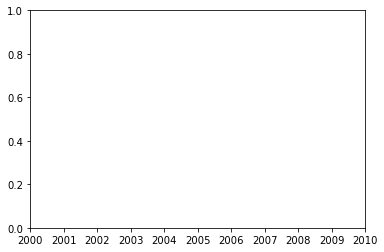

In [46]:
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("Monies")
plt.title("Monies for a home in 78739")

# Rental Data

In [21]:
df_rental = pd.read_csv("../rentals.csv")
df_rental.set_index("RegionName", inplace=True)
df_rental

,RegionID,SizeRank,RegionType,StateName,State,City,Metro,CountyName,2015-03-31,2015-04-30,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
77449,91940,0,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,1328.456694,1342.566883,...,1849.717480,1831.473991,1838.869462,1882.316420,1926.351443,1921.750980,1898.745658,1863.467645,1860.010515,1852.405696
77494,91982,1,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1559.889116,1561.690931,...,1875.818810,1888.481043,1912.707976,1938.008450,1947.656014,1952.896837,1931.676245,1913.120132,1910.071281,1938.350446
79936,93144,2,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,NaN,...,1288.994158,1297.766637,1312.688880,1359.851359,1393.908991,1405.965503,1382.438406,1393.769524,1400.401923,1438.359788
11385,62093,4,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2155.301037,2193.199603,...,2743.739202,2804.811028,2903.246676,2980.607440,3053.127245,3058.235155,3056.748587,3027.272428,2974.360069,2922.226049
90011,95992,5,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,NaN,NaN,...,NaN,NaN,1791.584605,1794.678304,1852.757859,1868.442226,1916.560685,1920.038550,1889.509994,1899.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37219,74250,23957,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.066647,1976.944444
11930,62281,24642,zip,NY,NY,NaN,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49391.059072,63149.625000
11959,62306,25872,zip,NY,NY,Quogue,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55000.000000


In [22]:
df_rental_local = df_rental.loc[df_rental["Metro"]=="Austin-Round Rock-Georgetown, TX", :]

In [23]:
df_rental_local_cut = df_rental_local.iloc[:,8:]


In [24]:
df_rental_ready = df_rental_local_cut.transpose()


In [25]:
df_rental_ready.columns

Int64Index([78660, 78666, 78641, 78613, 78745, 78664, 78640, 78753, 78681,
            78741, 78704, 78744, 78758, 78665, 78748, 78759, 78610, 78626,
            78628, 78723, 78749, 78634, 78717, 78750, 78705, 78746, 78727,
            78653, 78731, 78729, 78724, 78757, 78754, 78617, 78702, 78703,
            78728, 78739, 78752, 78621, 78735, 78734, 78747, 78738, 78620,
            78751, 78732, 78642, 78730, 78721, 78726, 78733, 78645, 78756,
            78701, 78736, 78722, 76537],
           dtype='int64', name='RegionName')

In [26]:
df_rental_over_time = df_rental_ready.loc[:, [78739, 78748, 78749, 78745, 78744, 78735, 78704, 78741, 78733, 78746, 78703, 78701, 78702, 78721, 78705, 78722, 78723, 78751, 78754, 78731, 78730, 78732, 78726, 78750, 78759, 78757, 78752, 78724, 78753, 78758, 78717, 78729, 78727, 78728]]


In [27]:
df_rental_over_time.reset_index(inplace=True)

In [29]:
df_rental_over_time.rename(columns={"index": "Date"}, inplace=True)

In [67]:

df_rental_over_time.to_csv("../Resources/rentals_over_time.csv", index=False)